## 旧

In [1]:
import os
from ultralytics import YOLO
from roboflow import Roboflow

# --- 1. データの準備 ---
# 自動でRoboflowからデータをダウンロードします
rf = Roboflow(api_key="OJhli9tA7VXWzXHAgQuj")
project = rf.workspace("g11-temb0").project("-8sx96")
version = project.version(4)
dataset = version.download("yolov11")

print(f"\nデータセットのダウンロード完了: {dataset.location}\n")

# --- 2. 学習の実行 ---
# エラー回避のため plots=False を設定しています
model = YOLO("yolo11n.pt")

print("学習を開始します...（時間がかかります）")

# 学習実行
results = model.train(
    data=f"{dataset.location}/data.yaml",
    epochs=50,
    imgsz=640,
    plots=False  # 【重要】グラフ描画エラーを回避する設定
)

# --- 3. 保存場所の表示 ---
# 学習結果の保存先フォルダを動的に取得します
save_dir = model.trainer.save_dir
best_model_path = os.path.join(save_dir, "weights", "best.pt")

# わかりやすく絶対パス（フルパス）に変換
abs_path = os.path.abspath(best_model_path)

print("\n" + "="*50)
print("✅ 学習が正常に完了しました！")
print("="*50)
print(f"結果の保存フォルダ: {save_dir}")
print("-" * 20)
print("【重要】学習済みモデル(best.pt)の場所:")
print(abs_path)
print("="*50 + "\n")

print("推論（テスト）を行うときは、上記のパスをコピーして使ってください。")

loading Roboflow workspace...
loading Roboflow project...

データセットのダウンロード完了: /Users/mihiraryouta/ハッカソン/学内ハッカソン/asobitai/smart_doc_gen/services/正答検知-4

学習を開始します...（時間がかかります）
Ultralytics 8.3.235 🚀 Python-3.12.12 torch-2.9.1 CPU (Apple M3)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/Users/mihiraryouta/ハッカソン/学内ハッカソン/asobitai/smart_doc_gen/services/正答検知-4/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, mo

全 6 枚の画像を処理します。

🔍 推論を実行中...: sample2.png

0: 480x640 (no detections), 29.9ms
Speed: 1.4ms preprocess, 29.9ms inference, 0.2ms postprocess per image at shape (1, 3, 480, 640)
   -> 何も検出されませんでした。


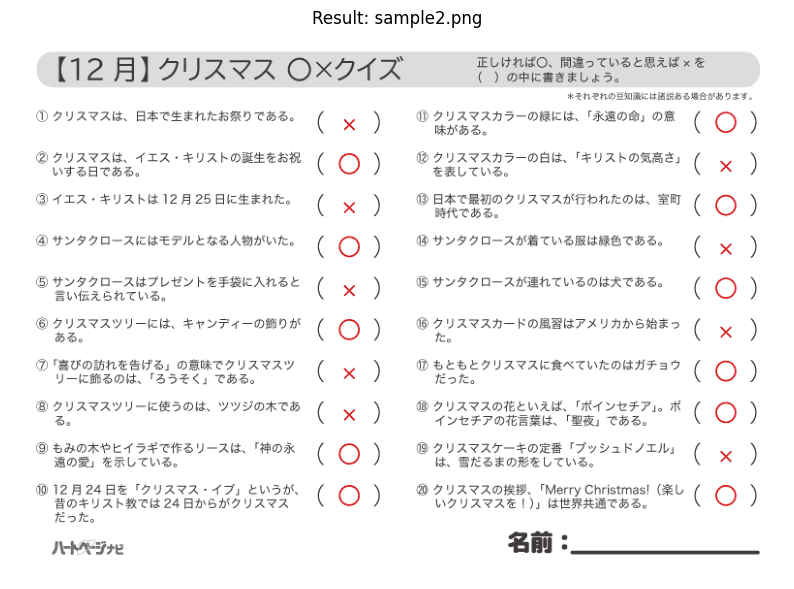

--------------------------------------------------
🔍 推論を実行中...: sample.png

0: 448x640 1 check, 2 circles, 25.0ms
Speed: 1.1ms preprocess, 25.0ms inference, 0.3ms postprocess per image at shape (1, 3, 448, 640)


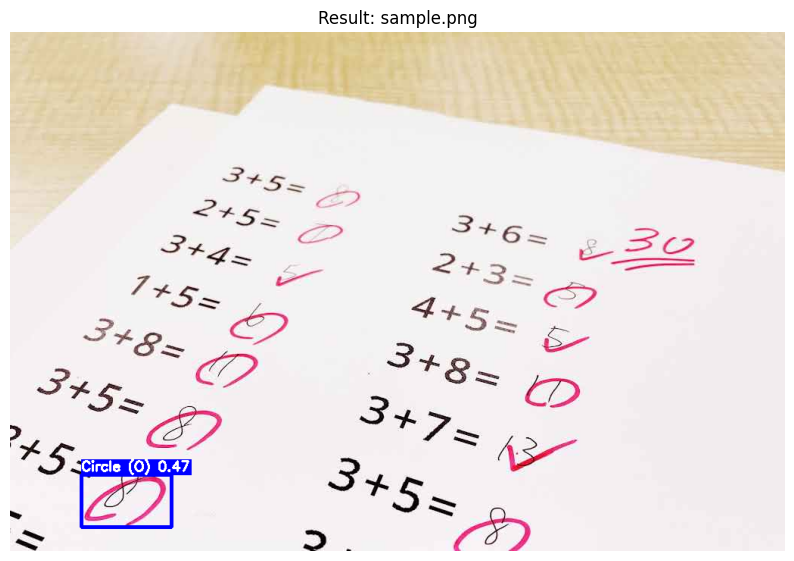

--------------------------------------------------
🔍 推論を実行中...: sample1.png

0: 480x640 1 check, 54 circles, 12 crosss, 51.5ms
Speed: 1.0ms preprocess, 51.5ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


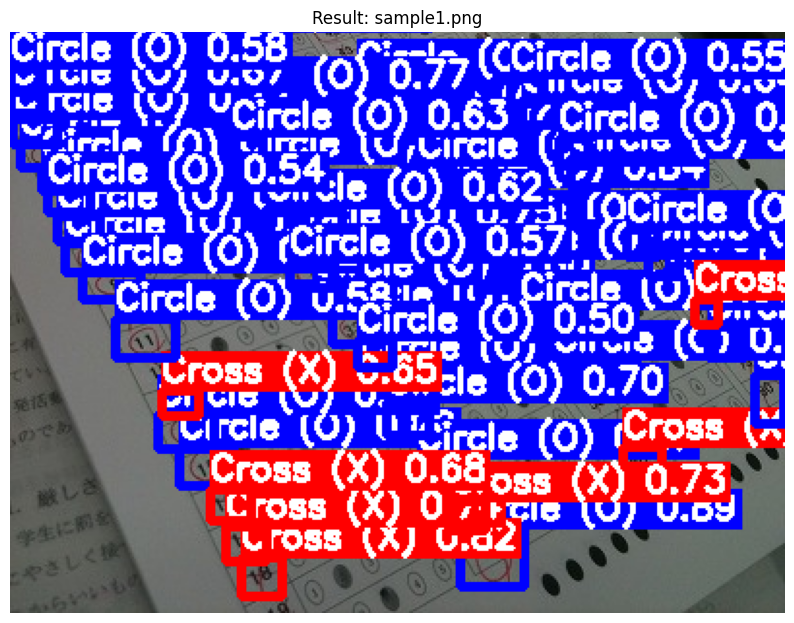

--------------------------------------------------
🔍 推論を実行中...: IMG_4579.jpg

0: 640x480 6 checks, 3 circles, 25.4ms
Speed: 1.9ms preprocess, 25.4ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 480)


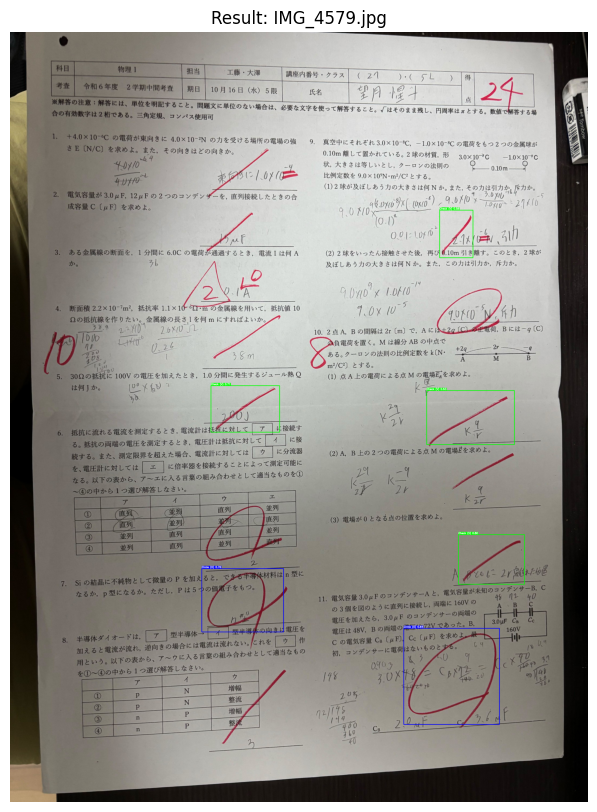

--------------------------------------------------
🔍 推論を実行中...: IMG_4578.jpg

0: 480x640 5 checks, 26.8ms
Speed: 1.6ms preprocess, 26.8ms inference, 0.3ms postprocess per image at shape (1, 3, 480, 640)


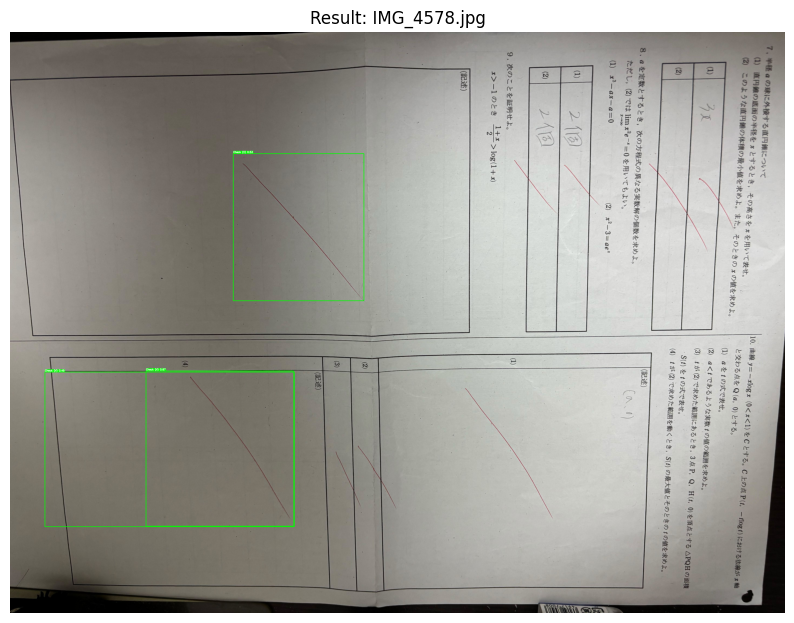

--------------------------------------------------
🔍 推論を実行中...: IMG_4577.jpg

0: 480x640 3 checks, 49.8ms
Speed: 1.5ms preprocess, 49.8ms inference, 0.3ms postprocess per image at shape (1, 3, 480, 640)


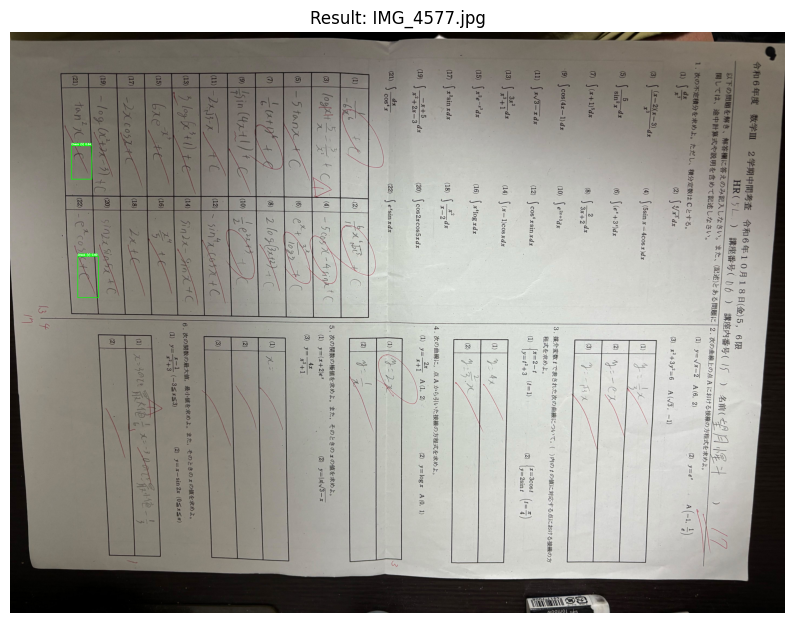

--------------------------------------------------
✅ すべての処理が完了しました。


In [14]:
import os
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO

# ==========================================
# 設定：ここを書き換えるだけでOKです
# ==========================================

# 1. ログで確認した「学習結果のフォルダ」
train_dir = "/Users/mihiraryouta/ハッカソン/学内ハッカソン/asobitai/runs/detect/train8"

# 2. テストしたい画像のパスを「リスト（[]）」にまとめました
target_images_list = [
    "/Users/mihiraryouta/ハッカソン/学内ハッカソン/asobitai/smart_doc_gen/services/sample2.png",
    "/Users/mihiraryouta/ハッカソン/学内ハッカソン/asobitai/smart_doc_gen/services/sample.png",
    "/Users/mihiraryouta/ハッカソン/学内ハッカソン/asobitai/smart_doc_gen/services/sample1.png",
    "/Users/mihiraryouta/ハッカソン/学内ハッカソン/asobitai/smart_doc_gen/services/IMG_4579.jpg",
    "/Users/mihiraryouta/ハッカソン/学内ハッカソン/asobitai/smart_doc_gen/services/IMG_4578.jpg",
    "/Users/mihiraryouta/ハッカソン/学内ハッカソン/asobitai/smart_doc_gen/services/IMG_4577.jpg"
]

# ==========================================
# 推論実行コード
# ==========================================

def run_inference_fixed_path(train_dir, image_path):
    # モデルファイルのパスを構築
    model_path = os.path.join(train_dir, "weights", "best.pt")

    # 1. パスチェック
    if not os.path.exists(model_path):
        print(f"❌ エラー: モデルファイルが見つかりません。")
        print(f"探した場所: {model_path}")
        return

    # モデル読み込み（初回のみロードするのが効率的ですが、簡易化のためここで読み込みます）
    model = YOLO(model_path)
    
    # 2. 画像読み込み
    if not os.path.exists(image_path):
        print(f"❌ エラー: 画像ファイルが存在しません: {image_path}")
        return
        
    img = cv2.imread(image_path)
    if img is None:
        print(f"❌ エラー: 画像を読み込めませんでした（破損の可能性）: {image_path}")
        return

    # 3. 推論実行
    print(f"🔍 推論を実行中...: {os.path.basename(image_path)}")
    results = model(img)

    # 4. 結果の描画
    found_any = False
    for result in results:
        boxes = result.boxes
        for box in boxes:
            found_any = True
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            conf = float(box.conf[0])
            cls = int(box.cls[0])
            label = model.names[cls]

            if conf < 0.4: continue # 信頼度40%未満は無視

            # ラベルごとの色設定
            if "maru" in label or "circle" in label:
                color = (255, 0, 0)      # 青
                text_label = "Circle (O)"
            elif "batsu" in label or "cross" in label:
                color = (0, 0, 255)      # 赤
                text_label = "Cross (X)"
            elif "check" in label:
                color = (0, 255, 0)      # 緑
                text_label = "Check (V)"
            elif "sankaku" in label or "triangle" in label:
                color = (0, 255, 255)    # 黄色
                text_label = "Triangle (^)"
            else:
                color = (128, 128, 128)
                text_label = label

            # 枠を描画
            cv2.rectangle(img, (x1, y1), (x2, y2), color, 3)
            
            # 文字を描画（背景付き）
            label_text = f"{text_label} {conf:.2f}"
            (w, h), _ = cv2.getTextSize(label_text, cv2.FONT_HERSHEY_SIMPLEX, 0.6, 2)
            cv2.rectangle(img, (x1, y1 - 20), (x1 + w, y1), color, -1)
            cv2.putText(img, label_text, (x1, y1 - 5), 
                        cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)

    if not found_any:
        print("   -> 何も検出されませんでした。")

    # 5. 表示
    # Matplotlibで表示（ウィンドウを閉じると次の画像の処理に進みます）
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(f"Result: {os.path.basename(image_path)}")
    plt.show()
    print("--------------------------------------------------")


# ==========================================
# 実行部分（ループ処理）
# ==========================================

print(f"全 {len(target_images_list)} 枚の画像を処理します。\n")

for target_image in target_images_list:
    run_inference_fixed_path(train_dir, target_image)

print("✅ すべての処理が完了しました。")

🔍 処理中: sample2.png

0: 480x640 (no detections), 34.2ms
Speed: 1.9ms preprocess, 34.2ms inference, 0.2ms postprocess per image at shape (1, 3, 480, 640)


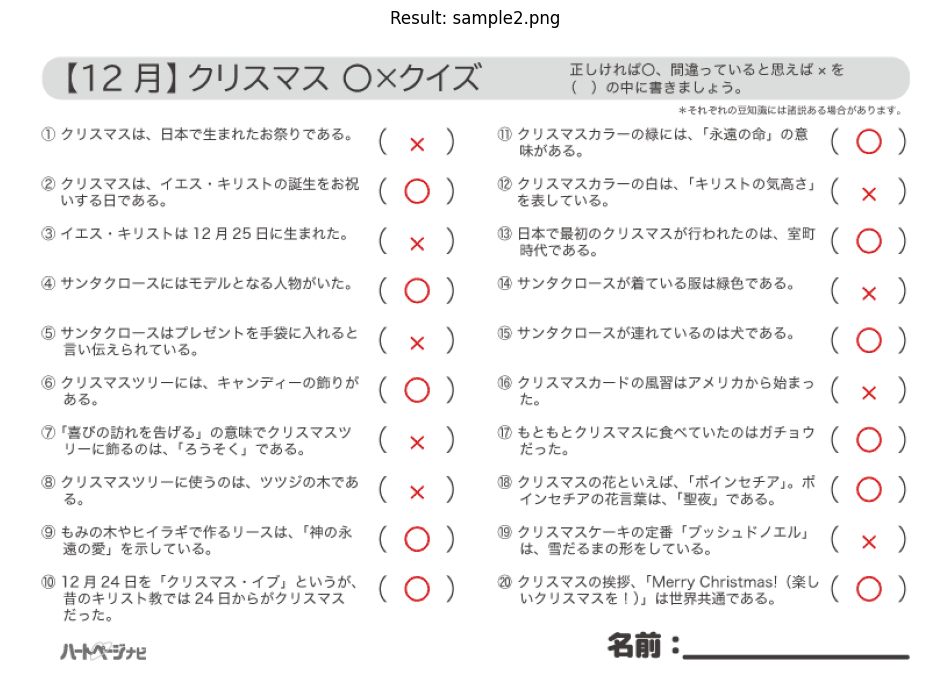

🔍 処理中: sample.png

0: 448x640 1 check, 2 circles, 26.8ms
Speed: 1.1ms preprocess, 26.8ms inference, 0.3ms postprocess per image at shape (1, 3, 448, 640)


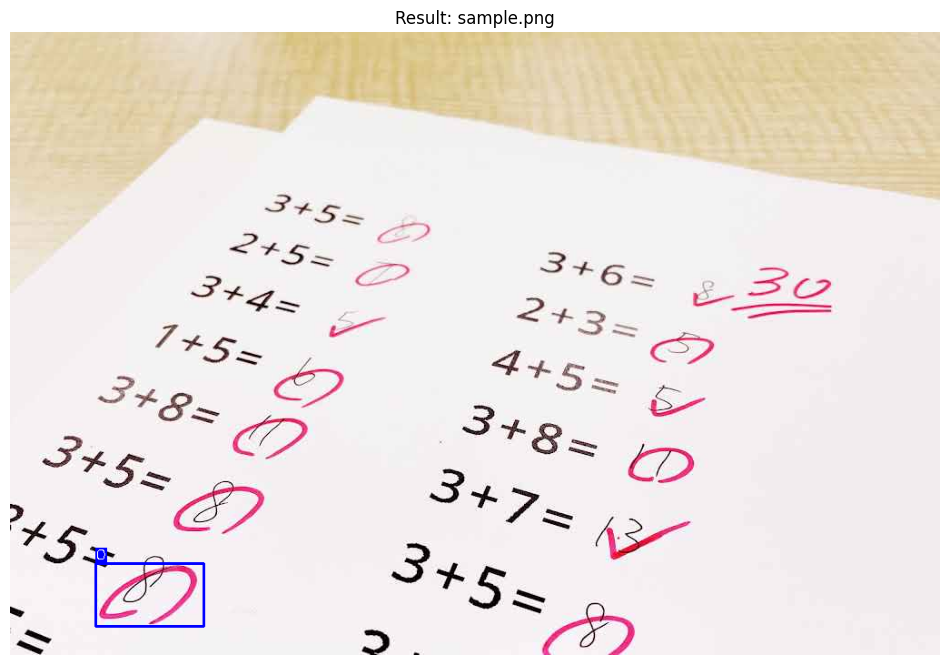

🔍 処理中: sample1.png

0: 480x640 1 check, 54 circles, 12 crosss, 36.8ms
Speed: 1.5ms preprocess, 36.8ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


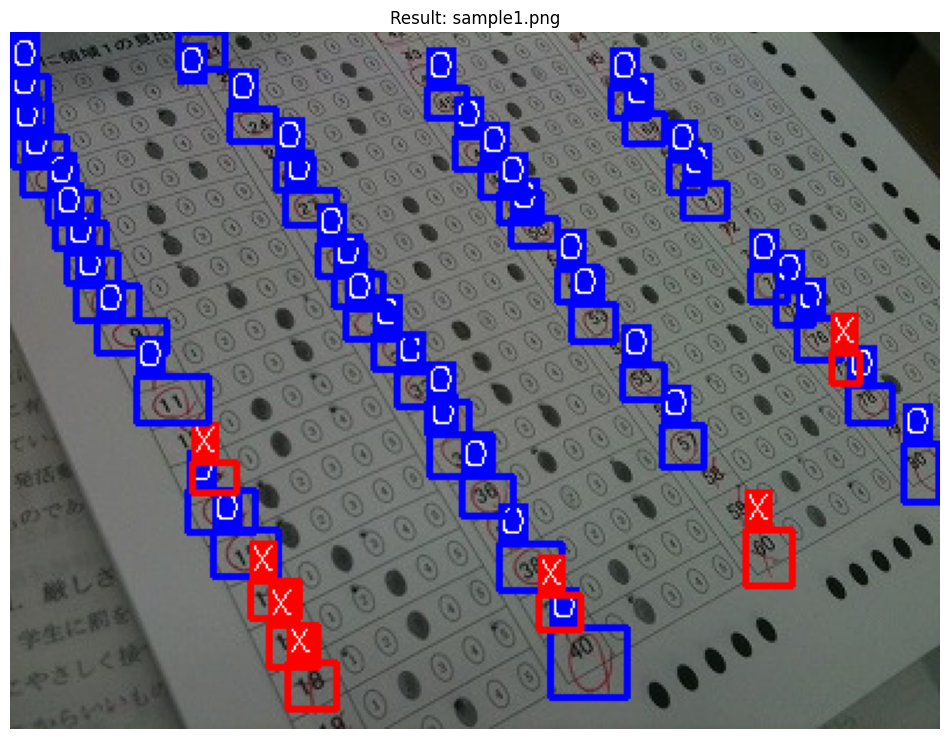

🔍 処理中: IMG_4579.jpg

0: 640x480 6 checks, 3 circles, 28.5ms
Speed: 1.6ms preprocess, 28.5ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 480)


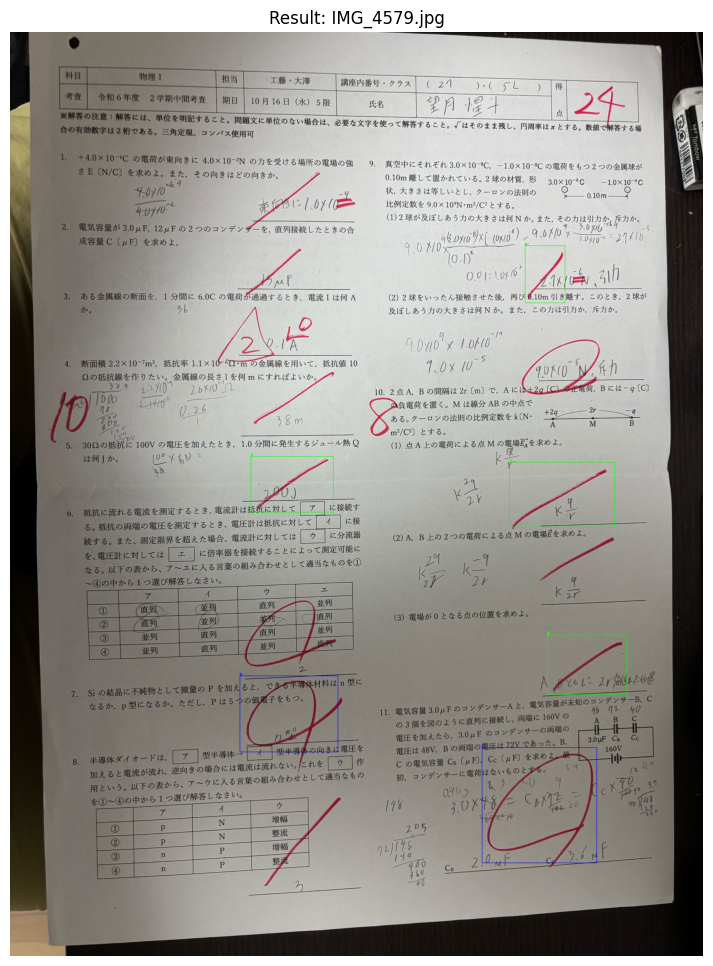

🔍 処理中: IMG_4578.jpg

0: 480x640 5 checks, 31.7ms
Speed: 1.8ms preprocess, 31.7ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)


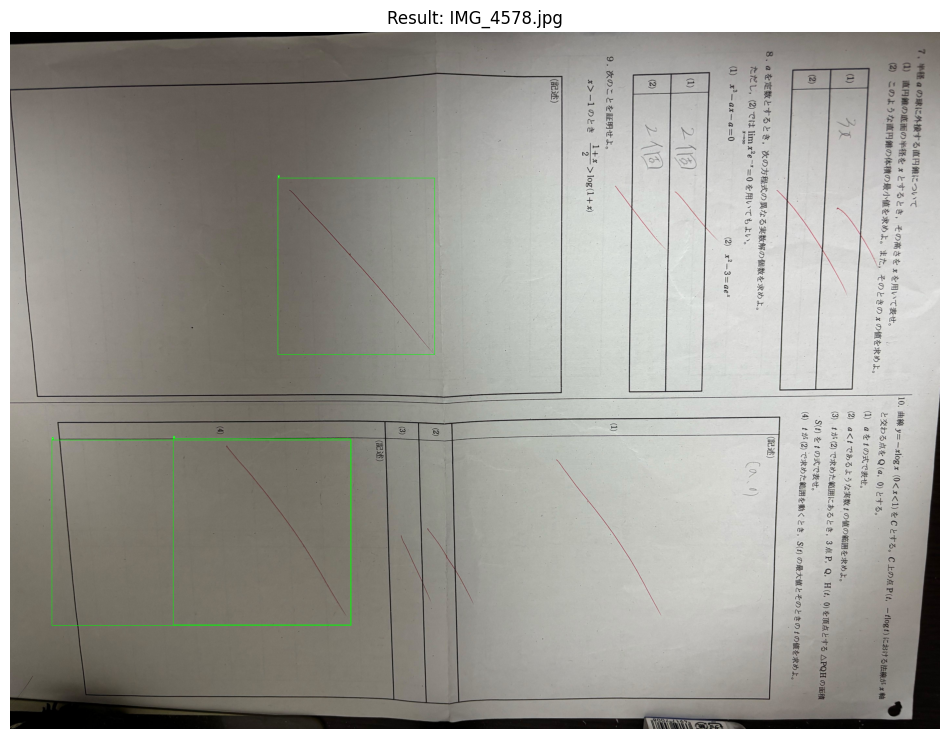

In [15]:
import os
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO

# ==========================================
# 設定
# ==========================================
# 1. 学習結果のフォルダパス
train_dir = "/Users/mihiraryouta/ハッカソン/学内ハッカソン/asobitai/runs/detect/train8"

# 2. テストしたい画像リスト
target_images_list = [
    "/Users/mihiraryouta/ハッカソン/学内ハッカソン/asobitai/smart_doc_gen/services/sample2.png",
    "/Users/mihiraryouta/ハッカソン/学内ハッカソン/asobitai/smart_doc_gen/services/sample.png",
    "/Users/mihiraryouta/ハッカソン/学内ハッカソン/asobitai/smart_doc_gen/services/sample1.png", # マークシートも追加
    "/Users/mihiraryouta/ハッカソン/学内ハッカソン/asobitai/smart_doc_gen/services/IMG_4579.jpg",
    "/Users/mihiraryouta/ハッカソン/学内ハッカソン/asobitai/smart_doc_gen/services/IMG_4578.jpg",
]

# ==========================================
# 見やすくした推論実行関数
# ==========================================
def run_inference_clean_view(train_dir, image_path):
    model_path = os.path.join(train_dir, "weights", "best.pt")
    
    if not os.path.exists(model_path):
        print(f"❌ エラー: モデルが見つかりません -> {model_path}")
        return

    model = YOLO(model_path)
    img = cv2.imread(image_path)
    if img is None:
        return

    print(f"🔍 処理中: {os.path.basename(image_path)}")
    results = model(img)

    for result in results:
        boxes = result.boxes
        for box in boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            conf = float(box.conf[0])
            cls = int(box.cls[0])
            label = model.names[cls]

            if conf < 0.4: continue 

            # --- 表示のカスタマイズ ---
            # 短いラベルにして見やすくする
            if "maru" in label or "circle" in label:
                color = (255, 0, 0)   # 青
                short_label = "O"     # シンプルに記号だけ
            elif "batsu" in label or "cross" in label:
                color = (0, 0, 255)   # 赤
                short_label = "X"
            elif "check" in label:
                color = (0, 255, 0)   # 緑
                short_label = "V"
            elif "sankaku" in label or "triangle" in label:
                color = (0, 255, 255) # 黄
                short_label = "^"
            else:
                color = (128, 128, 128)
                short_label = "?"

            # 枠を描く（少し細く: 3 -> 2）
            cv2.rectangle(img, (x1, y1), (x2, y2), color, 2)
            
            # 文字を書く（フォントサイズを小さく: 0.6 -> 0.5, 太さ 2 -> 1）
            # 背景ボックスは、文字が小さければ邪魔になりにくいので一旦オフにするか、小さく描画
            font_scale = 0.5
            thickness = 1
            
            (w, h), _ = cv2.getTextSize(short_label, cv2.FONT_HERSHEY_SIMPLEX, font_scale, thickness)
            
            # 枠の上に文字がはみ出ないよう調整
            text_y = y1 - 5 if y1 - 5 > 10 else y1 + h + 5
            
            # 背景塗りつぶし（文字が見やすいように）
            cv2.rectangle(img, (x1, text_y - h), (x1 + w, text_y + 5), color, -1)
            cv2.putText(img, short_label, (x1, text_y), 
                        cv2.FONT_HERSHEY_SIMPLEX, font_scale, (255, 255, 255), thickness)

    # 結果表示（Matplotlib）
    plt.figure(figsize=(12, 12)) # 画像を大きく表示
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(f"Result: {os.path.basename(image_path)}")
    plt.show()

# --- 実行 ---
for img_path in target_images_list:
    run_inference_clean_view(train_dir, img_path)

## 最新

In [1]:
import os
from ultralytics import YOLO
from roboflow import Roboflow

# --- 1. データの準備 ---
# 自動でRoboflowからデータをダウンロードします
rf = Roboflow(api_key="28lRoUeTWxwGRnmIa9eE")
project = rf.workspace("new-workspace-parzz").project("_2025")
version = project.version(1)
dataset = version.download("yolov11")


print(f"\nデータセットのダウンロード完了: {dataset.location}\n")

# --- 2. 学習の実行 ---
# エラー回避のため plots=False を設定しています
model = YOLO("yolo11n.pt")

print("学習を開始します...（時間がかかります）")

# 学習実行
results = model.train(
    data=f"{dataset.location}/data.yaml",
    epochs=50,
    imgsz=640,
    plots=False  # 【重要】グラフ描画エラーを回避する設定
)

# --- 3. 保存場所の表示 ---
# 学習結果の保存先フォルダを動的に取得します
save_dir = model.trainer.save_dir
best_model_path = os.path.join(save_dir, "weights", "best.pt")

# わかりやすく絶対パス（フルパス）に変換
abs_path = os.path.abspath(best_model_path)

print("\n" + "="*50)
print("✅ 学習が正常に完了しました！")
print("="*50)
print(f"結果の保存フォルダ: {save_dir}")
print("-" * 20)
print("【重要】学習済みモデル(best.pt)の場所:")
print(abs_path)
print("="*50 + "\n")

print("推論（テスト）を行うときは、上記のパスをコピーして使ってください。")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to 第二回ハッカソン_2025-1 in yolov11:: 100%|██████████| 324/324 [00:00<00:00, 8504.57it/s]



データセットのダウンロード完了: /Users/mihiraryouta/ハッカソン/学内ハッカソン/asobitai/smart_doc_gen/services/第二回ハッカソン_2025-1

学習を開始します...（時間がかかります）
Ultralytics 8.3.235 🚀 Python-3.12.12 torch-2.9.1 CPU (Apple M3)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/Users/mihiraryouta/ハッカソン/学内ハッカソン/asobitai/smart_doc_gen/services/第二回ハッカソン_2025-1/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1

In [4]:
import os
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO

# ==========================================
# 設定：ここを書き換えるだけでOKです
# ==========================================

# 1. ログで確認した「学習結果のフォルダ」
train_dir = "/Users/mihiraryouta/ハッカソン/学内ハッカソン/asobitai/runs/detect/train9/weights/best.pt"

# 2. テストしたい画像のパスを「リスト（[]）」にまとめました
target_images_list = [
    "/Users/mihiraryouta/ハッカソン/学内ハッカソン/asobitai/smart_doc_gen/services/sample2.png",
    "/Users/mihiraryouta/ハッカソン/学内ハッカソン/asobitai/smart_doc_gen/services/sample.png",
    "/Users/mihiraryouta/ハッカソン/学内ハッカソン/asobitai/smart_doc_gen/services/sample1.png",
    "/Users/mihiraryouta/ハッカソン/学内ハッカソン/asobitai/smart_doc_gen/services/IMG_4579.jpg",
    "/Users/mihiraryouta/ハッカソン/学内ハッカソン/asobitai/smart_doc_gen/services/IMG_4578.jpg",
    "/Users/mihiraryouta/ハッカソン/学内ハッカソン/asobitai/smart_doc_gen/services/IMG_4577.jpg"
]

# ==========================================
# 推論実行コード
# ==========================================

def run_inference_fixed_path(train_dir, image_path):
    # モデルファイルのパスを構築
    model_path = os.path.join(train_dir, "weights", "best.pt")

    # 1. パスチェック
    if not os.path.exists(model_path):
        print(f"❌ エラー: モデルファイルが見つかりません。")
        print(f"探した場所: {model_path}")
        return

    # モデル読み込み（初回のみロードするのが効率的ですが、簡易化のためここで読み込みます）
    model = YOLO(model_path)
    
    # 2. 画像読み込み
    if not os.path.exists(image_path):
        print(f"❌ エラー: 画像ファイルが存在しません: {image_path}")
        return
        
    img = cv2.imread(image_path)
    if img is None:
        print(f"❌ エラー: 画像を読み込めませんでした（破損の可能性）: {image_path}")
        return

    # 3. 推論実行
    print(f"🔍 推論を実行中...: {os.path.basename(image_path)}")
    results = model(img)

    # 4. 結果の描画
    found_any = False
    for result in results:
        boxes = result.boxes
        for box in boxes:
            found_any = True
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            conf = float(box.conf[0])
            cls = int(box.cls[0])
            label = model.names[cls]

            if conf < 0.4: continue # 信頼度40%未満は無視

            # ラベルごとの色設定
            if "maru" in label or "circle" in label:
                color = (255, 0, 0)      # 青
                text_label = "Circle (O)"
            elif "batsu" in label or "cross" in label:
                color = (0, 0, 255)      # 赤
                text_label = "Cross (X)"
            elif "check" in label:
                color = (0, 255, 0)      # 緑
                text_label = "Check (V)"
            elif "sankaku" in label or "triangle" in label:
                color = (0, 255, 255)    # 黄色
                text_label = "Triangle (^)"
            else:
                color = (128, 128, 128)
                text_label = label

            # 枠を描画
            cv2.rectangle(img, (x1, y1), (x2, y2), color, 3)
            
            # 文字を描画（背景付き）
            label_text = f"{text_label} {conf:.2f}"
            (w, h), _ = cv2.getTextSize(label_text, cv2.FONT_HERSHEY_SIMPLEX, 0.6, 2)
            cv2.rectangle(img, (x1, y1 - 20), (x1 + w, y1), color, -1)
            cv2.putText(img, label_text, (x1, y1 - 5), 
                        cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)

    if not found_any:
        print("   -> 何も検出されませんでした。")

    # 5. 表示
    # Matplotlibで表示（ウィンドウを閉じると次の画像の処理に進みます）
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(f"Result: {os.path.basename(image_path)}")
    plt.show()
    print("--------------------------------------------------")


# ==========================================
# 実行部分（ループ処理）
# ==========================================

print(f"全 {len(target_images_list)} 枚の画像を処理します。\n")

for target_image in target_images_list:
    run_inference_fixed_path(train_dir, target_image)

print("✅ すべての処理が完了しました。")

全 6 枚の画像を処理します。

❌ エラー: モデルファイルが見つかりません。
探した場所: /Users/mihiraryouta/ハッカソン/学内ハッカソン/asobitai/runs/detect/train9/weights/best.pt/weights/best.pt
❌ エラー: モデルファイルが見つかりません。
探した場所: /Users/mihiraryouta/ハッカソン/学内ハッカソン/asobitai/runs/detect/train9/weights/best.pt/weights/best.pt
❌ エラー: モデルファイルが見つかりません。
探した場所: /Users/mihiraryouta/ハッカソン/学内ハッカソン/asobitai/runs/detect/train9/weights/best.pt/weights/best.pt
❌ エラー: モデルファイルが見つかりません。
探した場所: /Users/mihiraryouta/ハッカソン/学内ハッカソン/asobitai/runs/detect/train9/weights/best.pt/weights/best.pt
❌ エラー: モデルファイルが見つかりません。
探した場所: /Users/mihiraryouta/ハッカソン/学内ハッカソン/asobitai/runs/detect/train9/weights/best.pt/weights/best.pt
❌ エラー: モデルファイルが見つかりません。
探した場所: /Users/mihiraryouta/ハッカソン/学内ハッカソン/asobitai/runs/detect/train9/weights/best.pt/weights/best.pt
✅ すべての処理が完了しました。
